## Import Datasets

In [4]:
import pandas as pd

amazon_df = pd.read_csv("datasets/amazon.csv")
# Round ratings to the nearest value
for idx, val in amazon_df['rating'].astype(str).items():
    try:
        amazon_df.at[idx, 'rating'] = round(float(val))
    except ValueError:
        amazon_df.drop(index=idx, inplace=True)

X_amazon = amazon_df['review_content'].str.lower()
y_amazon = amazon_df['rating'].astype(int)

print(X_amazon.head())
print(y_amazon.head())

starbucks_df = pd.read_csv("datasets/reviews_data.csv")
# Remove rows with NaN values in the 'Rating' column of starbucks_df
starbucks_df = starbucks_df.dropna(subset=['Rating'])
# Removes rows with non-numeric values
for idx, val in starbucks_df['Rating'].astype(str).items():
    try:
        starbucks_df.at[idx, 'Rating'] = round(float(val))
    except ValueError:
        print((idx, val))
        starbucks_df.drop(index=idx, inplace=True)

X_starbucks = starbucks_df['Review'].str.lower()
y_starbucks = starbucks_df['Rating'].astype(int)


print(X_starbucks.head())
print(y_starbucks.head())

flipkart_df = pd.read_csv("datasets/Dataset-SA.csv")
flipkart_df = flipkart_df.sample(n=4000, random_state=42).reset_index(drop=True)

# Removes rows with non-numeric values
for idx, val in flipkart_df['Rate'].astype(str).items():
    try:
        flipkart_df.at[idx, 'Rate'] = round(float(val))
    except ValueError:
        print((idx, val))
        flipkart_df.drop(index=idx, inplace=True)

X_flipkart = flipkart_df['Review'] + ' ' + flipkart_df['Summary']
X_flipkart = X_flipkart.str.lower()
y_flipkart = flipkart_df['Rate'].astype(int)

print(X_flipkart.head())
print(y_flipkart.head())


0    looks durable charging is fine toono complains...
1    i ordered this cable to connect my phone to an...
2    not quite durable and sturdy,https://m.media-a...
3    good product,long wire,charges good,nice,i bou...
4    bought this instead of original apple, does th...
Name: review_content, dtype: object
0    4
1    4
2    4
3    4
4    4
Name: rating, dtype: int32
0    amber and ladonna at the starbucks on southwes...
1    ** at the starbucks by the fire station on 436...
2    i just wanted to go out of my way to recognize...
3    me and my friend were at starbucks and my card...
4    i’m on this kick of drinking 5 cups of warm wa...
Name: Review, dtype: object
0    5
1    5
2    5
3    5
4    5
Name: Rating, dtype: int32
(1321, 'Pigeon Favourite Electric Kettle??????(1.5 L, Silver, Black)')
(2801, 'Nova Plus Amaze NI 10 1100 W Dry Iron?Ã\x83Â¿?Ã\x83Â¿(Grey & Turquoise)')
0          worst experience ever! not working properly
1                                  just wow! very good

## Models


--- Processing Amazon ---


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vishn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vishn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


  LogReg  —  Train: 1.000 | Val: 0.959 | Test: 0.956
  RandomForest  —  Train: 1.000 | Val: 0.956 | Test: 0.956


c:\Users\vishn\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(


Epoch 1/5  Train L=1.1872 A=0.7899  |  Val   L=0.2534 A=0.9522
Epoch 2/5  Train L=0.2717 A=0.9513  |  Val   L=0.2335 A=0.9522
Epoch 3/5  Train L=0.2414 A=0.9513  |  Val   L=0.2279 A=0.9522
Epoch 4/5  Train L=0.2370 A=0.9513  |  Val   L=0.2267 A=0.9522
Epoch 5/5  Train L=0.2373 A=0.9513  |  Val   L=0.2256 A=0.9522


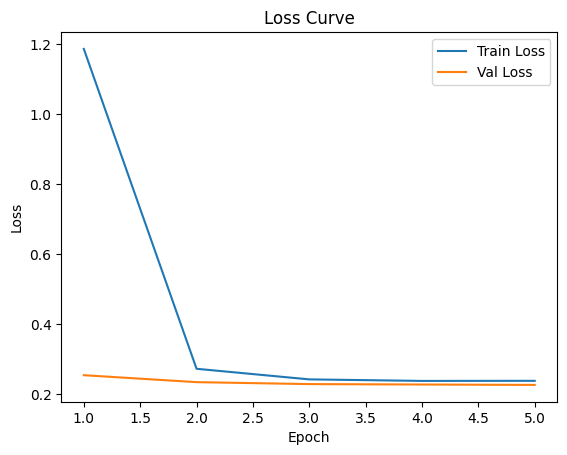

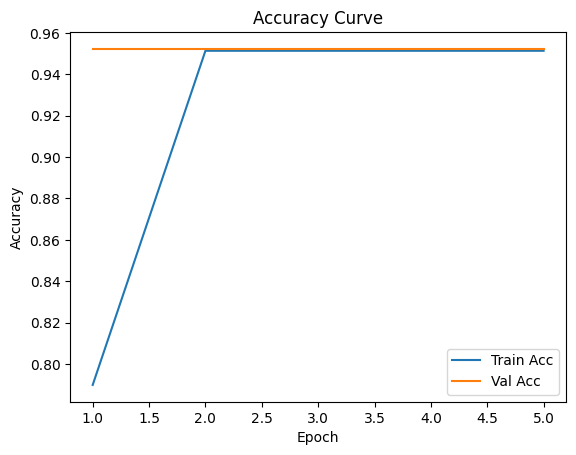

  LSTM          —  Test Acc: 0.952


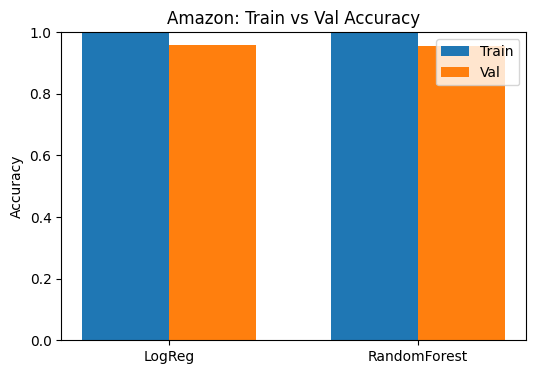


--- Processing Starbucks ---
  LogReg  —  Train: 1.000 | Val: 0.688 | Test: 0.702
  RandomForest  —  Train: 1.000 | Val: 0.695 | Test: 0.660


c:\Users\vishn\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(


Epoch 1/5  Train L=1.5493 A=0.4433  |  Val   L=1.4730 A=0.6383
Epoch 2/5  Train L=1.3274 A=0.6401  |  Val   L=1.2598 A=0.6383
Epoch 3/5  Train L=1.1890 A=0.6401  |  Val   L=1.1467 A=0.6383
Epoch 4/5  Train L=1.1287 A=0.6401  |  Val   L=1.1244 A=0.6383
Epoch 5/5  Train L=1.1210 A=0.6401  |  Val   L=1.1239 A=0.6383


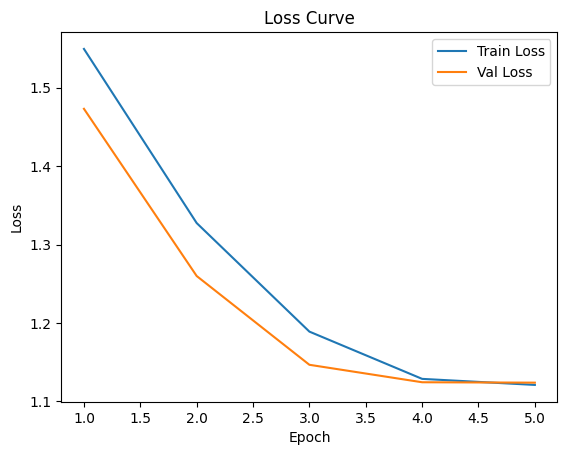

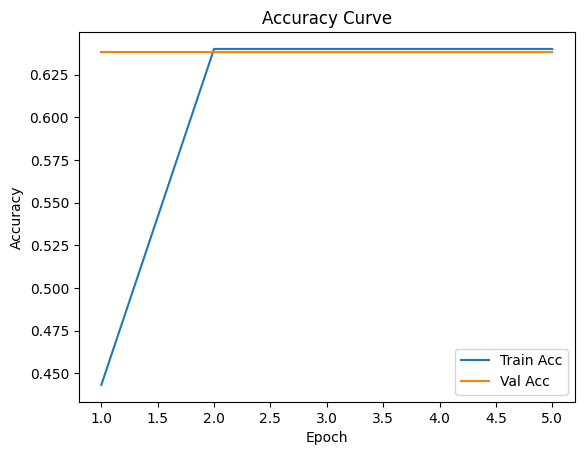

  LSTM          —  Test Acc: 0.638


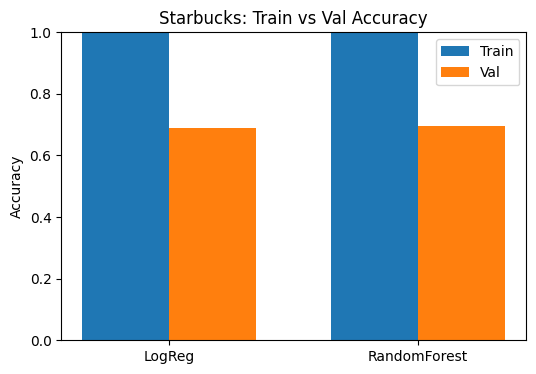


--- Processing Flipkart ---
  LogReg  —  Train: 0.906 | Val: 0.841 | Test: 0.868
  RandomForest  —  Train: 0.933 | Val: 0.814 | Test: 0.861


c:\Users\vishn\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn(


Epoch 1/5  Train L=1.2968 A=0.5463  |  Val   L=1.1783 A=0.5863
Epoch 2/5  Train L=1.1835 A=0.5857  |  Val   L=1.1767 A=0.5863
Epoch 3/5  Train L=1.1866 A=0.5857  |  Val   L=1.1765 A=0.5863
Epoch 4/5  Train L=1.1844 A=0.5857  |  Val   L=1.1809 A=0.5863
Epoch 5/5  Train L=1.1851 A=0.5857  |  Val   L=1.1757 A=0.5863


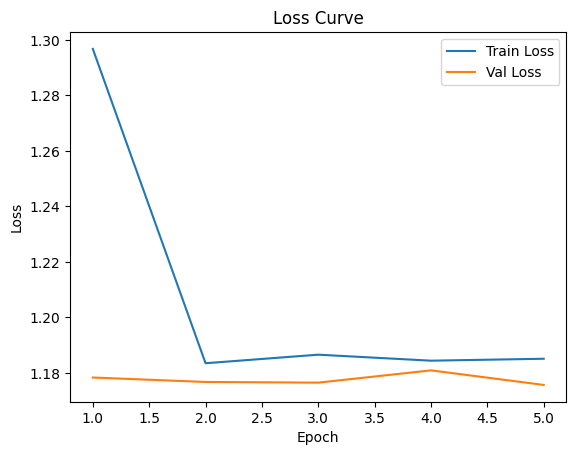

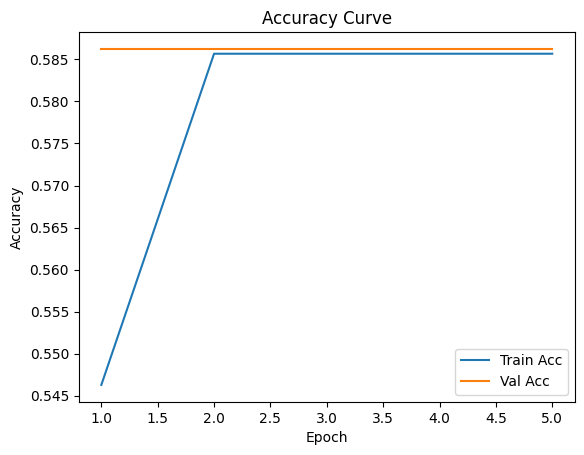

  LSTM          —  Test Acc: 0.586


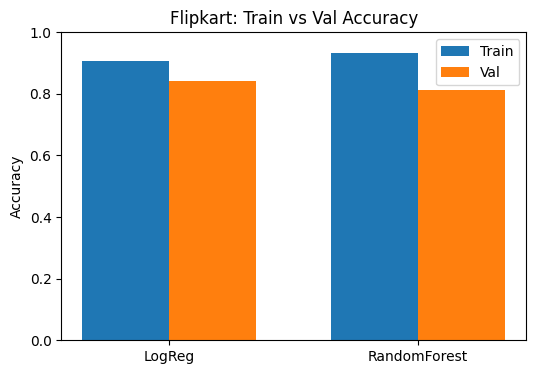


=== Summary ===
     Dataset  LR_Train    LR_Val   LR_Test  RF_Train    RF_Val   RF_Test  \
0     Amazon  1.000000  0.959044  0.955631  1.000000  0.955631  0.955631   
1  Starbucks  1.000000  0.687943  0.702128  1.000000  0.695035  0.659574   
2   Flipkart  0.906172  0.841250  0.867500  0.932861  0.813750  0.861250   

   LSTM_Test  
0   0.952218  
1   0.638298  
2   0.586250  


In [5]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# 1. NLTK setup (run once)
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = re.findall(r'\b\w+\b', str(text).lower())
    return [lemmatizer.lemmatize(tok) for tok in tokens if tok.isalpha() and tok not in stop_words]

# 2. PyTorch LSTM definition
class LSTMSentiment(nn.Module):
    def __init__(self, num_words, emb_dim, emb_mat):
        super().__init__()
        self.emb = nn.Embedding(num_words, emb_dim, padding_idx=0)
        self.emb.weight.data.copy_(torch.from_numpy(emb_mat))
        self.emb.weight.requires_grad = False
        self.lstm = nn.LSTM(emb_dim, 128, batch_first=True, dropout=0.2)
        self.drop = nn.Dropout(0.2)
        self.fc   = nn.Linear(128, 5)
    def forward(self, x):
        x, _ = self.lstm(self.emb(x))
        h    = x[:, -1, :]
        return self.fc(self.drop(h))

import matplotlib.pyplot as plt   # ← add at the top of your file

def train_lstm(tokens, labels, epochs=5, bs=64):
    # --- build Word2Vec + embedding matrix as before ---
    w2v = Word2Vec(sentences=tokens, vector_size=100, window=5, min_count=5, workers=4)
    vocab     = w2v.wv.key_to_index
    emb_dim   = w2v.vector_size
    num_words = len(vocab) + 1

    emb_mat = np.zeros((num_words, emb_dim), dtype=np.float32)
    idx_map = {w: i+1 for i, w in enumerate(vocab)}
    for w, idx in idx_map.items():
        emb_mat[idx] = w2v.wv[w]

    max_len = 200
    seqs = []
    for toks in tokens:
        idxs = [idx_map.get(t, 0) for t in toks][:max_len]
        seqs.append(idxs + [0]*(max_len - len(idxs)))
    X = np.array(seqs, dtype=np.int64)
    y = np.array(labels, dtype=np.int64)

    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    tr_ds = TensorDataset(torch.tensor(X_tr), torch.tensor(y_tr))
    te_ds = TensorDataset(torch.tensor(X_te), torch.tensor(y_te))
    tr_ld = DataLoader(tr_ds, batch_size=bs, shuffle=True)
    te_ld = DataLoader(te_ds, batch_size=bs)

    device = torch.device("cpu")
    model  = LSTMSentiment(num_words, emb_dim, emb_mat).to(device)
    crit   = nn.CrossEntropyLoss()
    opt    = torch.optim.Adam(model.parameters(), lr=1e-3)

    # — history lists —
    train_losses, valid_losses = [], []
    train_accs,   valid_accs   = [], []

    for ep in range(1, epochs+1):
        # --- training ---
        model.train()
        running_loss = running_corr = running_tot = 0
        for Xb, yb in tr_ld:
            opt.zero_grad()
            logits = model(Xb.to(device))
            loss   = crit(logits, yb.to(device))
            loss.backward()
            opt.step()

            running_loss += loss.item() * Xb.size(0)
            preds        = logits.argmax(dim=1).cpu()
            running_corr += (preds == yb).sum().item()
            running_tot  += yb.size(0)

        train_loss = running_loss / running_tot
        train_acc  = running_corr / running_tot

        # --- validation ---
        model.eval()
        val_loss = val_corr = val_tot = 0
        with torch.no_grad():
            for Xb, yb in te_ld:
                logits = model(Xb.to(device))
                loss   = crit(logits, yb.to(device))
                val_loss += loss.item() * Xb.size(0)
                preds    = logits.argmax(dim=1).cpu()
                val_corr += (preds == yb).sum().item()
                val_tot  += yb.size(0)

        valid_loss = val_loss / val_tot
        valid_acc  = val_corr / val_tot

        # store
        train_losses.append(train_loss)
        valid_losses.append(valid_loss)
        train_accs.append(train_acc)
        valid_accs.append(valid_acc)

        print(f"Epoch {ep}/{epochs}  "
              f"Train L={train_loss:.4f} A={train_acc:.4f}  |  "
              f"Val   L={valid_loss:.4f} A={valid_acc:.4f}")

    # — plotting —
    epochs_range = range(1, epochs+1)

    plt.figure()
    plt.plot(epochs_range, train_losses, label='Train Loss')
    plt.plot(epochs_range, valid_losses, label='Val Loss')
    plt.xlabel('Epoch'); plt.ylabel('Loss')
    plt.legend(); plt.title('Loss Curve')
    plt.show()

    plt.figure()
    plt.plot(epochs_range, train_accs, label='Train Acc')
    plt.plot(epochs_range, valid_accs, label='Val Acc')
    plt.xlabel('Epoch'); plt.ylabel('Accuracy')
    plt.legend(); plt.title('Accuracy Curve')
    plt.show()

    # return final validation accuracy (or whatever you like)
    return valid_accs[-1]

# 3. Prepare your datasets dictionary using existing X_ and y_
datasets = {
    "Amazon":   (X_amazon,   y_amazon),
    "Starbucks":(X_starbucks,y_starbucks),
    "Flipkart": (X_flipkart, y_flipkart)
}

results = []

for name, (X_series, y_series) in datasets.items():
    print(f"\n--- Processing {name} ---")
    # 1) preprocess
    tokens = X_series.apply(preprocess).tolist()
    text   = [" ".join(t) for t in tokens]
    labels = y_series - 1

    # 2) Train/Val/Test split (60/20/20)
    X_temp, X_test, y_temp, y_test = train_test_split(
        text, labels, test_size=0.2, stratify=labels, random_state=42
    )
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42
    )
    #    └─ 0.25 of 80% → 20% total

    # 3a) BOW + Logistic Regression
    pipe1 = Pipeline([
        ('cv',   CountVectorizer(max_features=5000)),
        ('clf',  LogisticRegression(max_iter=1000))
    ])
    pipe1.fit(X_train, y_train)
    acc1_tr  = pipe1.score(X_train, y_train)
    acc1_val = pipe1.score(X_val,   y_val)
    acc1_te  = pipe1.score(X_test,  y_test)
    print(f"  LogReg  —  Train: {acc1_tr:.3f} | Val: {acc1_val:.3f} | Test: {acc1_te:.3f}")

    # 3b) TF-IDF + Random Forest
    pipe2 = Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000)),
        ('clf',   RandomForestClassifier(n_estimators=200))
    ])
    pipe2.fit(X_train, y_train)
    acc2_tr  = pipe2.score(X_train, y_train)
    acc2_val = pipe2.score(X_val,   y_val)
    acc2_te  = pipe2.score(X_test,  y_test)
    print(f"  RandomForest  —  Train: {acc2_tr:.3f} | Val: {acc2_val:.3f} | Test: {acc2_te:.3f}")

    # 3c) LSTM (unchanged; still prints & plots inside)
    acc3_te = train_lstm(tokens, labels)
    print(f"  LSTM          —  Test Acc: {acc3_te:.3f}")

    # 4) record for summary
    results.append({
        "Dataset": name,
        "LR_Train":  acc1_tr,
        "LR_Val":    acc1_val,
        "LR_Test":   acc1_te,
        "RF_Train":  acc2_tr,
        "RF_Val":    acc2_val,
        "RF_Test":   acc2_te,
        "LSTM_Test": acc3_te
    })

    # 5) plot Train vs Val for LR & RF
    models   = ['LogReg', 'RandomForest']
    train_ac = [acc1_tr,   acc2_tr]
    val_ac   = [acc1_val,  acc2_val]
    x = np.arange(len(models))
    width = 0.35

    plt.figure(figsize=(6,4))
    plt.bar(x - width/2, train_ac, width, label='Train')
    plt.bar(x + width/2, val_ac,   width, label='Val')
    plt.xticks(x, models)
    plt.ylim(0,1)
    plt.ylabel('Accuracy')
    plt.title(f"{name}: Train vs Val Accuracy")
    plt.legend()
    plt.show()

# 6) summary DataFrame
results_df = pd.DataFrame(results)
print("\n=== Summary ===")
print(results_df)

